In [762]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

## 1. Data Selection


#### 1.1 Scraping Data

In [763]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'id.go.imigrasi.paspor_online',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=2787, # defaults to 100
    filter_score_with=None
)

In [764]:
data = pd.DataFrame(np.array(result), columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data.to_csv("scrapped_data_mpaspor_beforeSorting.csv", index = False)  #Save the file as CSV , to download: click the folder icon on the left. the csv file should be there.
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,429df713-8af6-4381-a01e-7f44bee58706,Alrescha,https://play-lh.googleusercontent.com/a/ACg8oc...,"LOL. ga bisa dipake. baru di Langkah 1, udah e...",1,2,6.1.0,2024-07-07 18:59:31,None,None,6.1.0
1,8255570f-7aa2-435e-a801-884c4d5618d4,Cullya Chandra,https://play-lh.googleusercontent.com/a/ACg8oc...,Tolong bantu validasi kalau misalnya sudah pun...,2,48,6.1.0,2024-05-04 13:30:40,None,None,6.1.0
2,6e71b0e2-31a7-417b-8f09-b5d966f85368,Santoso Low,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aplikasinya perlu terus ditingkatkan, misalnya...",2,113,6.1.0,2024-03-28 21:36:56,None,None,6.1.0
3,c10ffc98-b1d4-4ee4-b44e-f2562c25ea8d,Flyer_452 Official,https://play-lh.googleusercontent.com/a-/ALV-U...,Sistem pembayaran kacau sekali. Saat memencet ...,1,93,6.1.0,2024-06-02 12:51:51,None,None,6.1.0
4,ef927aeb-ce03-4590-9b80-21ea5bb114ae,Cipluk Turwita,https://play-lh.googleusercontent.com/a/ACg8oc...,"Saat pendaftaran akun, Email typo, jadi otp ti...",1,47,6.1.0,2024-05-11 16:32:30,None,None,6.1.0
...,...,...,...,...,...,...,...,...,...,...,...
2782,584f5984-b987-4d32-8c34-aa08c08b09c5,dede,https://play-lh.googleusercontent.com/a/ACg8oc...,Ini bukan mempermudah malah mempersulit... dat...,1,0,5.2.1,2023-01-31 21:08:46,None,None,5.2.1
2783,631dc2d9-b35c-4500-aae0-a105296769a6,Ali Kurniadi,https://play-lh.googleusercontent.com/a-/ALV-U...,"Mau login atau daftar, harus verifikasi email....",1,0,5.2.1,2022-09-16 09:57:20,None,None,5.2.1
2784,ec9e4724-4c3f-4628-80f9-f4e36893f389,Irfandi Reza,https://play-lh.googleusercontent.com/a/ACg8oc...,Apa guna nya aplikasi ini ...sehari buka aplik...,1,1,6.1.0,2023-11-17 18:43:25,None,None,6.1.0
2785,f5b0cab5-7329-407b-8dda-a4d6cde47558,Erwi Mariati,https://play-lh.googleusercontent.com/a/ACg8oc...,Suka error padahal sudah masuk email pembayara...,1,0,5.4.7,2023-05-16 17:25:28,None,None,5.4.7


##### Sorting Data by Oldest

In [765]:
scrappeddata1 = data[['content','score','at']]
sorteddata = scrappeddata1.sort_values(by='at', ascending=True) #Sort by Oldest, change to False if you want to sort by Newest.
sorteddata.head()

,content,score,at
906,Pak sebenarnya saya ini mau tanya kenapa pas s...,1,2022-01-05 21:42:38
1253,Bagus sangat membantu.. Semoga kedepannya maki...,5,2022-01-14 13:29:26
1283,Ga guna aplikasi daftar onlinenya. Datang keka...,1,2022-01-20 09:51:45
1869,"Sangat membantu sekali,kita bisa langsung upla...",5,2022-01-27 17:22:09
2602,Tolong perbaiki sistem nya. Gampang eror masih...,1,2022-01-28 11:38:09


In [766]:
sorteddata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2787 entries, 906 to 2645
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   content  2787 non-null   object        
 1   score    2787 non-null   int64         
 2   at       2787 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 87.1+ KB


##### Extraksi fitur at 

In [767]:
sorteddata['Year'] = sorteddata['at'].dt.year
sorteddata['Month'] = sorteddata['at'].dt.month
sorteddata['Day'] = sorteddata['at'].dt.day

In [768]:
sorteddata

,content,score,at,Year,Month,Day
906,Pak sebenarnya saya ini mau tanya kenapa pas s...,1,2022-01-05 21:42:38,2022,1,5
1253,Bagus sangat membantu.. Semoga kedepannya maki...,5,2022-01-14 13:29:26,2022,1,14
1283,Ga guna aplikasi daftar onlinenya. Datang keka...,1,2022-01-20 09:51:45,2022,1,20
1869,"Sangat membantu sekali,kita bisa langsung upla...",5,2022-01-27 17:22:09,2022,1,27
2602,Tolong perbaiki sistem nya. Gampang eror masih...,1,2022-01-28 11:38:09,2022,1,28
...,...,...,...,...,...,...
154,"Saya sudah bayar, tapi status pembayaran masih...",1,2024-07-05 21:14:00,2024,7,5
2412,"Gak bermutu,dan berguna semua kuota daerah sum...",1,2024-07-06 10:49:11,2024,7,6
1905,"Aplikasi apaan ini, mau masuk berhari-hari tid...",1,2024-07-07 17:31:05,2024,7,7
0,"LOL. ga bisa dipake. baru di Langkah 1, udah e...",1,2024-07-07 18:59:31,2024,7,7


In [769]:
df = sorteddata[['content','score','Year','Month','Day']] #menghapus fitur at karna sudah direpresentasikan
df

,content,score,Year,Month,Day
906,Pak sebenarnya saya ini mau tanya kenapa pas s...,1,2022,1,5
1253,Bagus sangat membantu.. Semoga kedepannya maki...,5,2022,1,14
1283,Ga guna aplikasi daftar onlinenya. Datang keka...,1,2022,1,20
1869,"Sangat membantu sekali,kita bisa langsung upla...",5,2022,1,27
2602,Tolong perbaiki sistem nya. Gampang eror masih...,1,2022,1,28
...,...,...,...,...,...
154,"Saya sudah bayar, tapi status pembayaran masih...",1,2024,7,5
2412,"Gak bermutu,dan berguna semua kuota daerah sum...",1,2024,7,6
1905,"Aplikasi apaan ini, mau masuk berhari-hari tid...",1,2024,7,7
0,"LOL. ga bisa dipake. baru di Langkah 1, udah e...",1,2024,7,7


In [770]:
df['score'].value_counts()

score
1    2308
2     216
5     109
3     106
4      48
Name: count, dtype: int64

In [771]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2787 entries, 906 to 2645
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2787 non-null   object
 1   score    2787 non-null   int64 
 2   Year     2787 non-null   int32 
 3   Month    2787 non-null   int32 
 4   Day      2787 non-null   int32 
dtypes: int32(3), int64(1), object(1)
memory usage: 98.0+ KB


##### Distribusi Review berdasarkan score/rating


<Axes: xlabel='score'>

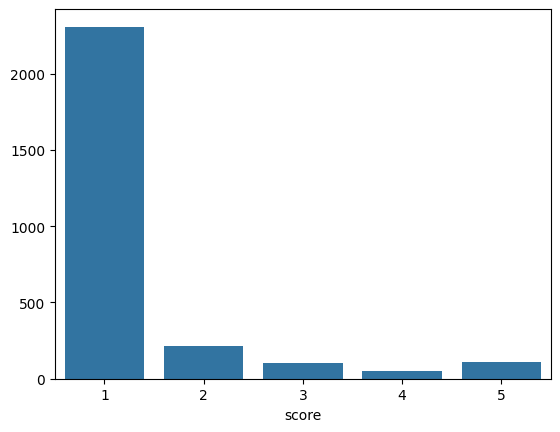

In [772]:
import seaborn as sns
result = df.groupby(['score']).size()
 
# plot the result
sns.barplot(x = result.index, y = result.values)

In [773]:
df.to_csv("scrapped_data_mpaspor_afterSorting.csv", index = False)  #Save the file as CSV , to download: click the folder icon on the left. the csv file should be there.

#### 1.2 Labelling Data

In [823]:
#Positif = 1
#Negatif = 0

df = pd.read_csv('scrapped_data_mpaspor_afterSorting.csv')

sentimen = []
for index, row in df.iterrows():
    if row['score'] <= 3 :
        sentimen.append(0) 
    else:
        sentimen.append(1)
df['sentiment'] = sentimen
df.head(3)

,content,score,Year,Month,Day,sentiment
0,Pak sebenarnya saya ini mau tanya kenapa pas s...,1,2022,1,5,0
1,Bagus sangat membantu.. Semoga kedepannya maki...,5,2022,1,14,1
2,Ga guna aplikasi daftar onlinenya. Datang keka...,1,2022,1,20,0


##### Distribusi Sentimen

<Axes: xlabel='sentiment'>

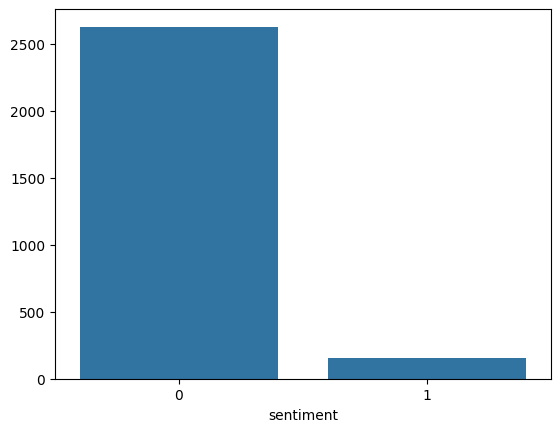

In [776]:
df_new = df[['Year', 'Month', 'sentiment']]
#df_new
result = df_new.groupby(['sentiment']).size()
 
# plot the result
sns.barplot(x = result.index, y = result.values)


Text(0.5, 1.0, 'Distribution of sentiment')

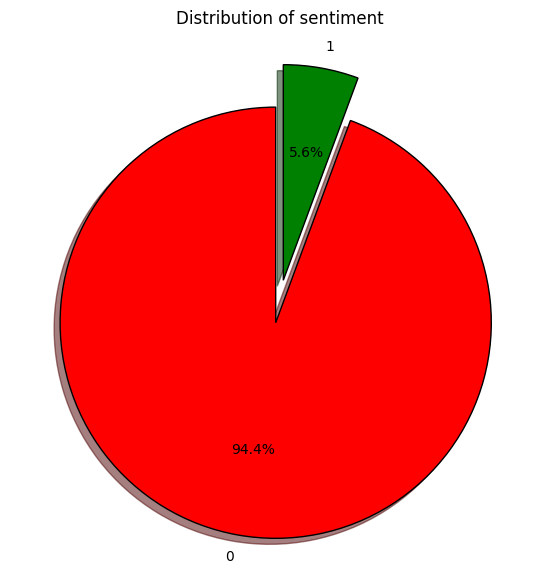

In [777]:
#pie chart to show percentage distribution of polarity
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
wp={'linewidth':1, 'edgecolor': 'black'}
tags=df_new['sentiment'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of sentiment')


<Axes: xlabel='Year', ylabel='count'>

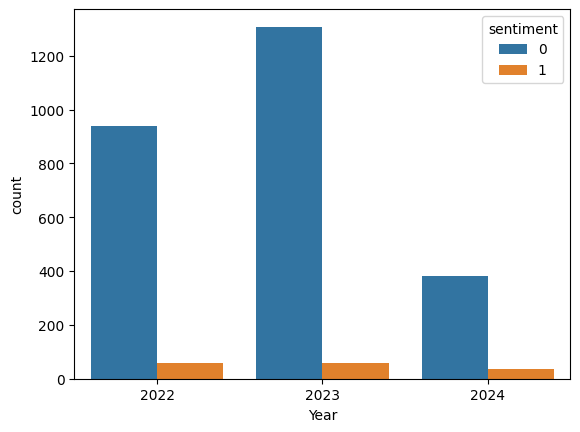

In [778]:
import seaborn as sns
sns.countplot(data=df_new,x='Year',hue='sentiment')

In [779]:
df3 = df_new.groupby(['Year','sentiment'])['sentiment'].count()
df3

Year  sentiment
2022  0             940
      1              60
2023  0            1308
      1              60
2024  0             382
      1              37
Name: sentiment, dtype: int64

In [780]:
df['sentiment'].value_counts()

sentiment
0    2630
1     157
Name: count, dtype: int64

In [781]:
df.to_csv("data_mpaspor_afterLabeling.csv", index = False)  #Save the file as CSV , to download: click the folder icon on the left. the csv file should be there.

## 2.Preprosessing

#### 2.1 Data

In [837]:
data = pd.read_csv('data_mpaspor_afterLabeling.csv') #loadCsv
df = data.copy() #backup df
df 

,content,score,Year,Month,Day,sentiment
0,Pak sebenarnya saya ini mau tanya kenapa pas s...,1,2022,1,5,0
1,Bagus sangat membantu.. Semoga kedepannya maki...,5,2022,1,14,1
2,Ga guna aplikasi daftar onlinenya. Datang keka...,1,2022,1,20,0
3,"Sangat membantu sekali,kita bisa langsung upla...",5,2022,1,27,1
4,Tolong perbaiki sistem nya. Gampang eror masih...,1,2022,1,28,0
...,...,...,...,...,...,...
2782,"Saya sudah bayar, tapi status pembayaran masih...",1,2024,7,5,0
2783,"Gak bermutu,dan berguna semua kuota daerah sum...",1,2024,7,6,0
2784,"Aplikasi apaan ini, mau masuk berhari-hari tid...",1,2024,7,7,0
2785,"LOL. ga bisa dipake. baru di Langkah 1, udah e...",1,2024,7,7,0


#### 2.2 Cleaning

In [838]:
df = df[['content', 'score', 'sentiment']]
df.head(3)

,content,score,sentiment
0,Pak sebenarnya saya ini mau tanya kenapa pas s...,1,0
1,Bagus sangat membantu.. Semoga kedepannya maki...,5,1
2,Ga guna aplikasi daftar onlinenya. Datang keka...,1,0


#### 2.3 Case Folding

In [839]:
def clean_content(content):
    import string, re
    
    content = content.lower() # menjadikan lowercase
    content = re.sub("[^a-z]", " ", content) # hapus semua karakter kecuali a-z
    content = re.sub("\t", " ", content) # mengganti tab dengan spasi
    content = re.sub("\n", " ", content) # mengganti new line dengan spasi
    content = re.sub("\s+", " ", content) # mengganti spasi > 1 dengan 1 spasi
    content = content.strip() # menghapus spasi di awal dan akhir 
    
    return content


In [843]:
# membandingkan before dan after
raw_sample = df['content'].iloc[4]
case_folding = clean_content(raw_sample)

print('Raw data\t : ', raw_sample)
print('Case Folding\t : ', case_folding)


Raw data	 :  Tolong perbaiki sistem nya. Gampang eror masih perlu di kaji lagi biar lebih normal dan tdk menyulitkan pendaftaran.
Case Folding	 :  tolong perbaiki sistem nya gampang eror masih perlu di kaji lagi biar lebih normal dan tdk menyulitkan pendaftaran


In [835]:
df['content'] = df['content'].apply(clean_content)
df

,content,score,sentiment
0,pak sebenarnya saya ini mau tanya kenapa pas s...,1,0
1,bagus sangat membantu semoga kedepannya makin ...,5,1
2,ga guna aplikasi daftar onlinenya datang kekan...,1,0
3,sangat membantu sekali kita bisa langsung upla...,5,1
4,tolong perbaiki sistem nya gampang eror masih ...,1,0
...,...,...,...
2782,saya sudah bayar tapi status pembayaran masih ...,1,0
2783,gak bermutu dan berguna semua kuota daerah sum...,1,0
2784,aplikasi apaan ini mau masuk berhari hari tida...,1,0
2785,lol ga bisa dipake baru di langkah udah error ...,1,0


#### 2.4 Normalisasi

In [846]:
def koreksi_penulisan(content):
    import re
    
    dict_koreksi = {}
    file = open("list koreksi penulisan (tambahan sendiri).txt")
    for x in file:
        f = x.split(":")
        dict_koreksi.update({f[0].strip(): f[1].strip()})
    
    for awal, pengganti in dict_koreksi.items():
        #content = str(content).replace(awal, pengganti)
        content = re.sub(r"\b" + awal + r"\b", pengganti, content)
    
    return content

In [847]:
# membandingkan before dan after
raw_sample = df['content'].iloc[4]
normalisasikata = koreksi_penulisan(raw_sample)

print('Raw data\t : ', raw_sample)
print('Normalisasi\t : ', normalisasikata)


Raw data	 :  Tolong perbaiki sistem nya. Gampang eror masih perlu di kaji lagi biar lebih normal dan tdk menyulitkan pendaftaran.
Normalisasi	 :  Tolong perbaiki sistem nya. Gampang error masih perlu di kaji lagi biar lebih normal dan tidak menyulitkan pendaftaran.


In [786]:
# Coba lihat waktu yang diperlukan untuk running program
from datetime import datetime
start_time = datetime.now()

df["content"] = df["content"].apply(koreksi_penulisan) 

end_time = datetime.now()
print("Durasi Koreksi Penulisan: {}".format(end_time - start_time))

Durasi Koreksi Penulisan: 0:00:16.485800


#### 2.5 Tokenizing

In [787]:
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')
df['content_token']=df['content'].apply(regexp.tokenize)
df.head(3)

,content,score,sentiment,content_token
0,pak sebenarnya saya ini mau tanya kenapa pas s...,1,0,"[pak, sebenarnya, saya, ini, mau, tanya, kenap..."
1,bagus sangat membantu semoga kedepannya makin ...,5,1,"[bagus, sangat, membantu, semoga, kedepannya, ..."
2,tidak guna aplikasi daftar onlinenya datang ke...,1,0,"[tidak, guna, aplikasi, daftar, onlinenya, dat..."


#### 2.6 Filtering (Stopword Removal)

In [788]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Make a list of indonesian stopwords
stopwords = nltk.corpus.stopwords.words("indonesian")
# Extend the list with your own custom stopwords
my_stopwords = ['mpaspor', 'lol']
stopwords.extend(my_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\afift\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [789]:
# Remove stopwords
df['content_filtering'] = df['content_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(10)

,content,score,sentiment,content_token,content_filtering
0,pak sebenarnya saya ini mau tanya kenapa pas s...,1,0,"[pak, sebenarnya, saya, ini, mau, tanya, kenap...","[pas, login, akun, aplikasi, m, pasport, gagal..."
1,bagus sangat membantu semoga kedepannya makin ...,5,1,"[bagus, sangat, membantu, semoga, kedepannya, ...","[bagus, membantu, semoga, kedepannya, diupdate..."
2,tidak guna aplikasi daftar onlinenya datang ke...,1,0,"[tidak, guna, aplikasi, daftar, onlinenya, dat...","[aplikasi, daftar, onlinenya, kekantor, imigra..."
3,sangat membantu sekali kita bisa langsung upla...,5,1,"[sangat, membantu, sekali, kita, bisa, langsun...","[membantu, langsung, uplaod, dokumen, asli, ba..."
4,tolong perbaiki sistem nya gampang error masih...,1,0,"[tolong, perbaiki, sistem, nya, gampang, error...","[tolong, perbaiki, sistem, nya, gampang, error..."
5,kok selalu request time out terus sih terus gm...,1,0,"[kok, selalu, request, time, out, terus, sih, ...","[request, time, out, sih, gmna, masuknya, diin..."
6,aplikasi sering error di saat kita mau mengung...,2,0,"[aplikasi, sering, error, di, saat, kita, mau,...","[aplikasi, error, mengunggah, dokumen, nya, pe..."
7,konfirmasi email ditunggu tunggu gak sampai ja...,4,1,"[konfirmasi, email, ditunggu, tunggu, gak, sam...","[konfirmasi, email, ditunggu, tunggu, gak, log..."
8,download lama log in susah sudah upload crash ...,1,0,"[download, lama, log, in, susah, sudah, upload...","[download, log, in, susah, upload, crash, kani..."
9,bingung sudah install terus di suruh masukkan ...,2,0,"[bingung, sudah, install, terus, di, suruh, ma...","[bingung, install, suruh, masukkan, kode, otp,..."


#### 2.7 Stemming

In [792]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [793]:
df['stemmed'] = df['content_filtering'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [794]:
df['text_string'] = df['stemmed'].apply(lambda x: ' '.join([item for item in x if len(item)>3])) 
df.head(5)

,content,score,sentiment,content_token,content_filtering,stemmed,text_string
0,pak sebenarnya saya ini mau tanya kenapa pas s...,1,0,"[pak, sebenarnya, saya, ini, mau, tanya, kenap...","[pas, login, akun, aplikasi, m, pasport, gagal...","[pas, login, akun, aplikasi, m, pasport, gagal...",login akun aplikasi pasport gagal akun kirim h...
1,bagus sangat membantu semoga kedepannya makin ...,5,1,"[bagus, sangat, membantu, semoga, kedepannya, ...","[bagus, membantu, semoga, kedepannya, diupdate...","[bagus, bantu, moga, depan, diupdate, wilayah,...",bagus bantu moga depan diupdate wilayah daerah...
2,tidak guna aplikasi daftar onlinenya datang ke...,1,0,"[tidak, guna, aplikasi, daftar, onlinenya, dat...","[aplikasi, daftar, onlinenya, kekantor, imigra...","[aplikasi, daftar, onlinenya, kantor, imigrasi...",aplikasi daftar onlinenya kantor imigrasi pili...
3,sangat membantu sekali kita bisa langsung upla...,5,1,"[sangat, membantu, sekali, kita, bisa, langsun...","[membantu, langsung, uplaod, dokumen, asli, ba...","[bantu, langsung, uplaod, dokumen, asli, bayar...",bantu langsung uplaod dokumen asli bayar atur ...
4,tolong perbaiki sistem nya gampang error masih...,1,0,"[tolong, perbaiki, sistem, nya, gampang, error...","[tolong, perbaiki, sistem, nya, gampang, error...","[tolong, baik, sistem, nya, gampang, error, ka...",tolong baik sistem gampang error kaji biar nor...


In [795]:
df.to_csv('data_mpaspor_stemed.csv') #write dataframe into csv file

## 3. TF-IDF

In [820]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

tf = df['text_string']
cv = CountVectorizer()
term_fit = cv.fit(tf)
print(len(term_fit.vocabulary_))
     


4029


In [ ]:
term_fit.vocabulary_

In [ ]:

# Kolom pertama ini berarti jumlah dokumen
# Kolom kedua berarti letak kata nya
# Kolom ketiga berarti hasil dari tf

term_frequency_all = term_fit.transform(tf)
print(term_frequency_all)

In [796]:
X = df['text_string']
y = df['sentiment']
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [877]:
# Simpan vectorizer dalam bentuk pickle
with open("vectorizer_tfidf.pkl", "wb") as f:
    pickle.dump(tfid, f)

In [857]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

## 4. Modeling

#### Split Data 80:20

In [860]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2,random_state=42)

#### 1.SVM

In [861]:
svm = SVC(kernel="linear")
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [869]:
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)*100

97.81368821292776

In [875]:
# Simpan model dalam bentuk pickle
with open("model_svc.pkl", "wb") as f:
    pickle.dump(svm, f)

#### 2.Random Forest

In [863]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [870]:
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)*100

98.66920152091255

In [876]:
# Simpan model dalam bentuk pickle
with open("model_rf.pkl", "wb") as f:
    pickle.dump(random_forest_classifier, f)

## 5. Evaluasi

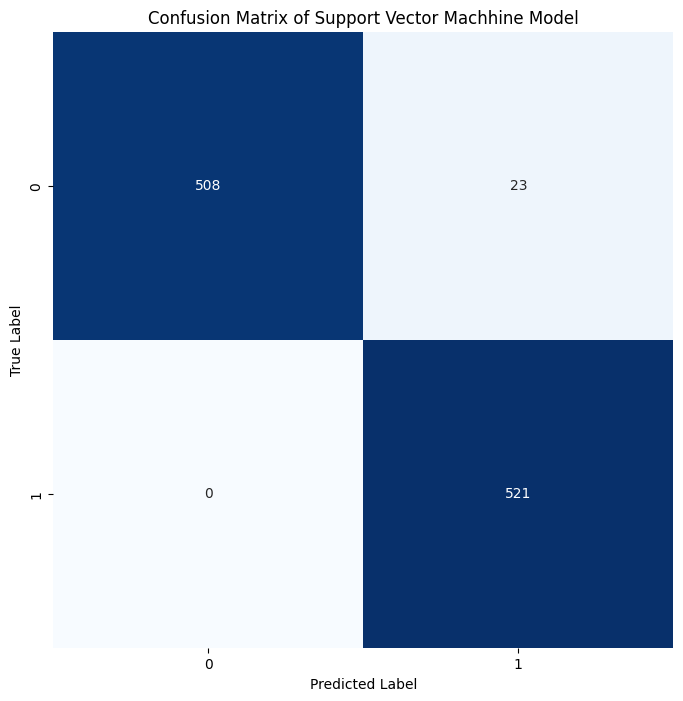

In [865]:
conf_mat = confusion_matrix(y_test, svm_prediction)

plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cbar=None, cmap='Blues', fmt='.0f')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of Support Vector Machhine Model')
plt.show()


In [866]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

matrix = classification_report(y_test,svm_prediction)
print('Classification report SVM: \n',matrix)

Classification report SVM: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       531
           1       0.96      1.00      0.98       521

    accuracy                           0.98      1052
   macro avg       0.98      0.98      0.98      1052
weighted avg       0.98      0.98      0.98      1052



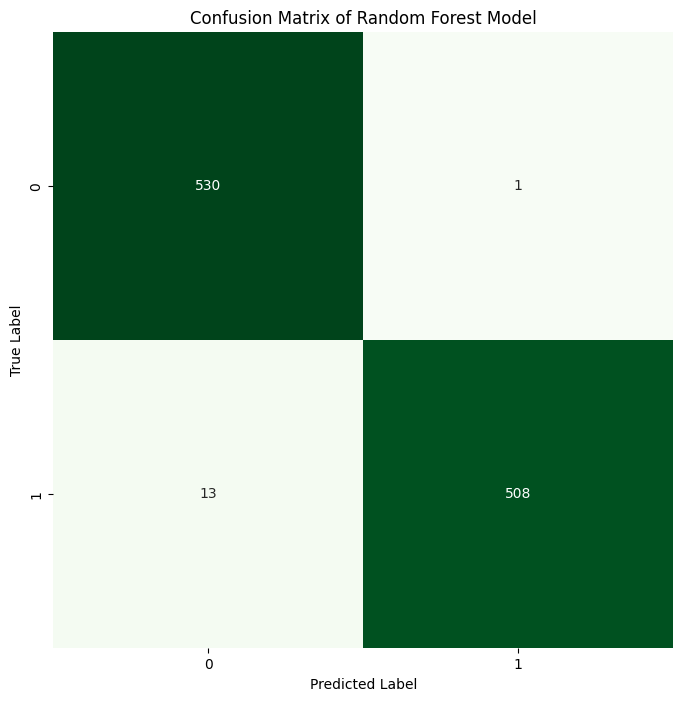

In [867]:
conf_mat = confusion_matrix(y_test, random_forest_classifier_prediction)

plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cbar=None, cmap='Greens', fmt='.0f')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of Random Forest Model')
plt.show()


In [814]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

matrix = classification_report(y_test,random_forest_classifier_prediction)
print('Classification report Random Forest: \n',matrix)

Classification report Random Forest: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       531
           1       1.00      0.98      0.99       521

    accuracy                           0.99      1052
   macro avg       0.99      0.99      0.99      1052
weighted avg       0.99      0.99      0.99      1052

